## Procesamiento y analisis estadistico

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
""" #URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")"""

' #URL de la API\nurl = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json"\n\n# Hacer la solicitud GET\nresponse = requests.get(url)\n\n# Verificar si la solicitud fue exitosa\nif response.status_code == 200:\n    # Convertir la respuesta a JSON\n    data = response.json()\n    print("Datos obtenidos exitosamente")'

In [3]:
"""features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista"""

"features = data.get('features', [])  # Obtener la lista de features\nrows = []  # Lista para almacenar los datos\n\n# Recorrer cada feature y extraer los atributos\nfor feature in features:\n    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos\n    rows.append(attributes)  # Agregar los atributos a la lista"

In [4]:
#accidentes_data = pd.DataFrame(rows)
accidentes_data = pd.read_csv("proy_datasets/Accidentes.csv")
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,BOGOTA DC,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,BOGOTA DC,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,BOGOTA DC,4.637275,-74.170754


In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [6]:
#accidentes_data = pd.DataFrame(rows)

accidentes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FORMULARIO            2000 non-null   object 
 1   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 2   HORA_OCURRENCIA_ACC   2000 non-null   object 
 3   ANO_OCURRENCIA_ACC    2000 non-null   float64
 4   MES_OCURRENCIA_ACC    2000 non-null   object 
 5   DIA_OCURRENCIA_ACC    2000 non-null   object 
 6   DIRECCION             2000 non-null   object 
 7   GRAVEDAD              2000 non-null   object 
 8   CLASE_ACC             2000 non-null   object 
 9   LOCALIDAD             2000 non-null   object 
 10  MUNICIPIO             2000 non-null   object 
 11  LATITUD               2000 non-null   float64
 12  LONGITUD              2000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 203.3+ KB


In [7]:
accidentes_data.isna().sum()

,0
FORMULARIO,0
FECHA_OCURRENCIA_ACC,0
HORA_OCURRENCIA_ACC,0
ANO_OCURRENCIA_ACC,0
MES_OCURRENCIA_ACC,0
DIA_OCURRENCIA_ACC,0
DIRECCION,0
GRAVEDAD,0
CLASE_ACC,0
LOCALIDAD,0


In [8]:
# accidentes_data.drop(columns=['PK_CALZADA'],inplace=True) # Información que cuenta con demasiados valores nulos

In [9]:
# accidentes_data.drop(columns=['CIV'],inplace=True) # Información que no es relevante para el análisis

In [10]:
accidentes_data.isna().sum()

,0
FORMULARIO,0
FECHA_OCURRENCIA_ACC,0
HORA_OCURRENCIA_ACC,0
ANO_OCURRENCIA_ACC,0
MES_OCURRENCIA_ACC,0
DIA_OCURRENCIA_ACC,0
DIRECCION,0
GRAVEDAD,0
CLASE_ACC,0
LOCALIDAD,0


In [11]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [12]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FORMULARIO            2000 non-null   object 
 1   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 2   HORA_OCURRENCIA_ACC   2000 non-null   object 
 3   ANO_OCURRENCIA_ACC    2000 non-null   float64
 4   MES_OCURRENCIA_ACC    2000 non-null   object 
 5   DIA_OCURRENCIA_ACC    2000 non-null   object 
 6   DIRECCION             2000 non-null   object 
 7   GRAVEDAD              2000 non-null   object 
 8   CLASE_ACC             2000 non-null   object 
 9   LOCALIDAD             2000 non-null   object 
 10  MUNICIPIO             2000 non-null   object 
 11  LATITUD               2000 non-null   float64
 12  LONGITUD              2000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 203.3+ KB


In [13]:
accidentes_data['MUNICIPIO'].value_counts()
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá

In [14]:
#accidentes_data.drop(columns=['OBJECTID','FECHA_HORA_ACC'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá
#accidentes_data.head(5)

In [15]:
accidentes_data['CLASE_ACC'].value_counts()

,count
CLASE_ACC,
CHOQUE,1530
ATROPELLO,343
CAIDA DE OCUPANTE,69
VOLCAMIENTO,42
OTRO,15
INCENDIO,1


In [16]:
accidentes_data['GRAVEDAD'].value_counts()

,count
GRAVEDAD,
CON HERIDOS,1479
SOLO DANOS,459
CON MUERTOS,62


array([[<Axes: title={'center': 'FECHA_OCURRENCIA_ACC'}>,
        <Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>],
       [<Axes: title={'center': 'LATITUD'}>,
        <Axes: title={'center': 'LONGITUD'}>]], dtype=object)

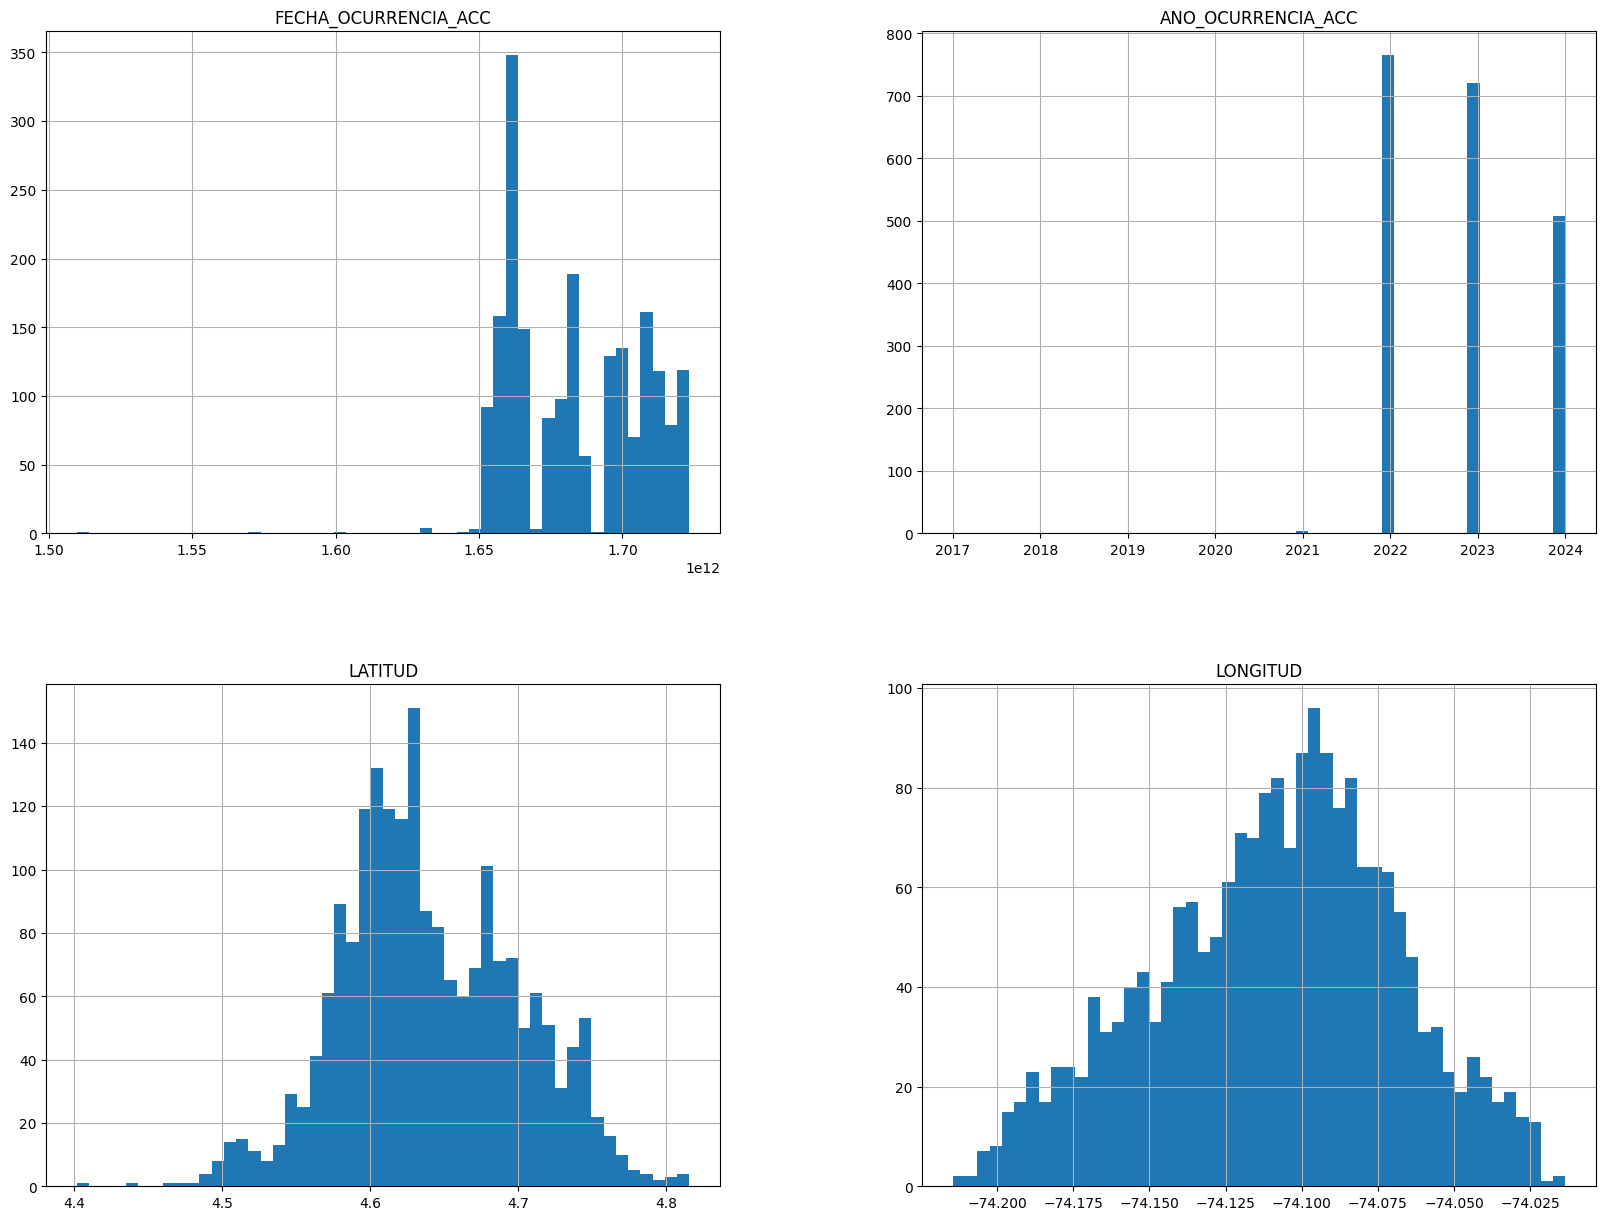

In [17]:
accidentes_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

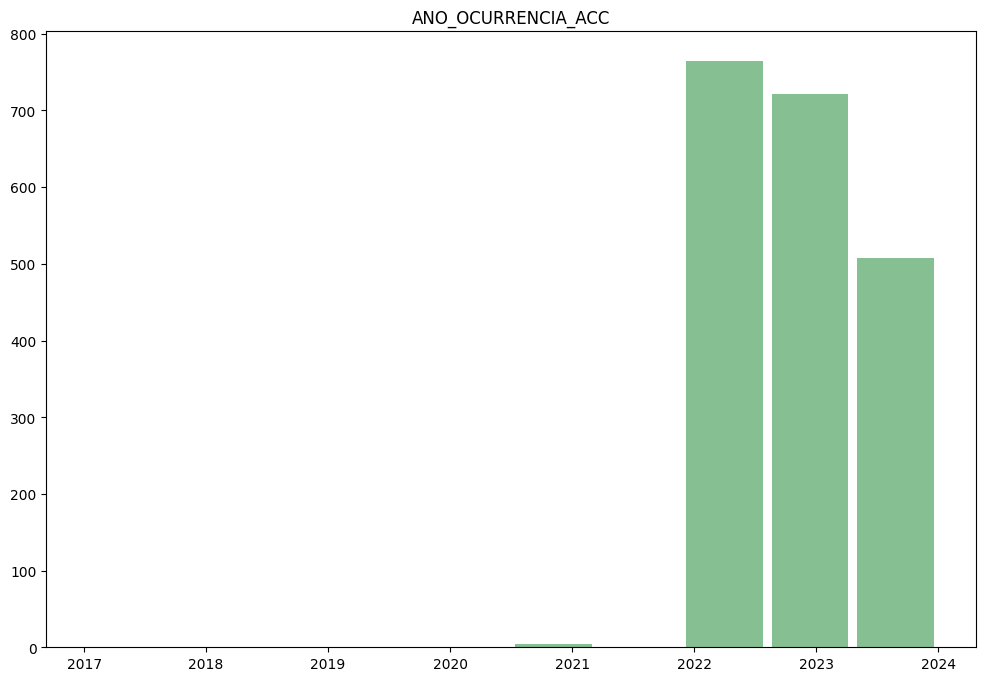

In [18]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

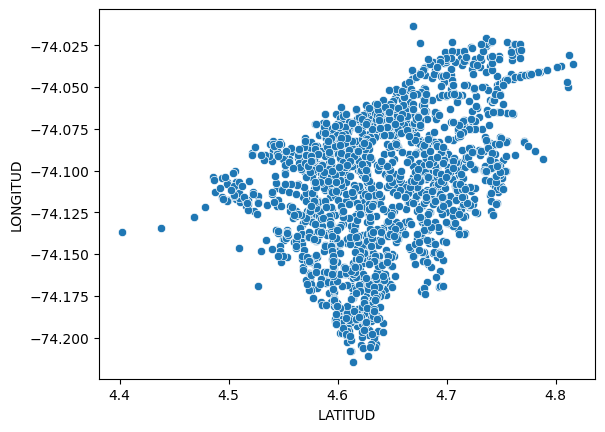

In [19]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

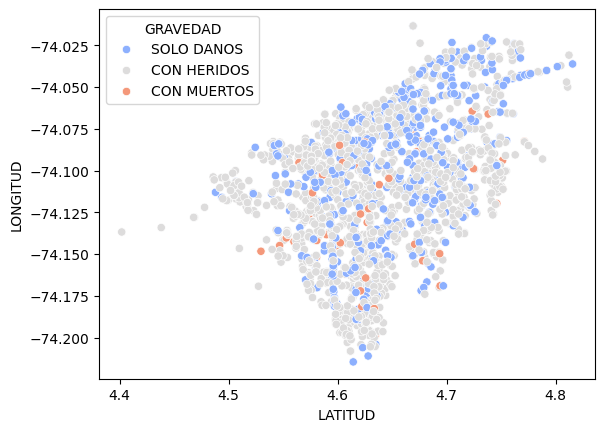

In [20]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

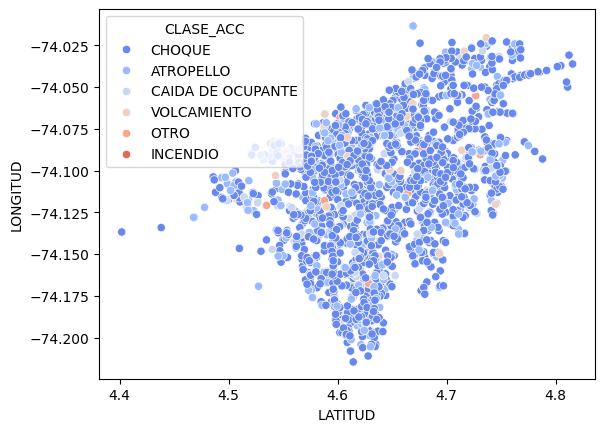

In [21]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")

## Ajuste de datos

In [22]:
accidentes_data.head(5)

,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001606763,1709787600000,08:00:00,2024.0,MARZO,JUEVES,KR 105 C - CL 66 02,SOLO DANOS,CHOQUE,ENGATIVA,4.699109,-74.124926
1,A001609376,1710565200000,01:30:00,2024.0,MARZO,SABADO,CL 26 S- KR 78 B 02,CON HERIDOS,ATROPELLO,KENNEDY,4.625398,-74.147784
2,A001609394,1710478800000,12:40:00,2024.0,MARZO,VIERNES,CL 71 B S- KR 16 C 02,CON HERIDOS,CHOQUE,CIUDAD BOLIVAR,4.544940,-74.136136
3,A001609496,1710478800000,10:30:00,2024.0,MARZO,VIERNES,DG 39 A S- KR 39 A 02,CON HERIDOS,CHOQUE,PUENTE ARANDA,4.594984,-74.123122
4,A001609304,1710478800000,09:16:00,2024.0,MARZO,VIERNES,KR 89 - CL 42 S 02,CON MUERTOS,CHOQUE,KENNEDY,4.637275,-74.170754


In [23]:
accidentes_data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(accidentes_data['FECHA_OCURRENCIA_ACC'], unit='ms')  # Pasamos la fecha a correcto formato datetime

# Obtener el intervalo de tiempo correcto
fecha_min = accidentes_data['FECHA_OCURRENCIA_ACC'].min().replace(day=1) #Ponemos la fecha minima como el primer dia del mes para que el intervalo de meses quede completo
fecha_max = accidentes_data['FECHA_OCURRENCIA_ACC'].max()

print(f"El intervalo de tiempo presente en el dataframe es desde {fecha_min} hasta {fecha_max}")

# Agrupar por mes y contar el número de accidentes
aux_mes = accidentes_data.groupby(accidentes_data['FECHA_OCURRENCIA_ACC'].dt.to_period('M')).size().reset_index(name='cantidad_accidentes')

# Convertir la columna de periodo a datetime (primer día del mes)
aux_mes['FECHA_OCURRENCIA_ACC'] = aux_mes['FECHA_OCURRENCIA_ACC'].dt.to_timestamp()

# Generar un rango de meses completo dentro del intervalo
rango_meses = pd.date_range(start=fecha_min, end=fecha_max, freq='MS').normalize()

# Crear un nuevo DataFrame con el rango de meses
accidentes_por_mes = pd.DataFrame({'FECHA_OCURRENCIA_ACC': rango_meses})

# Hacer un merge con los datos de accidentes y llenar los valores NaN con 0
accidentes_por_mes = accidentes_por_mes.merge(aux_mes, on='FECHA_OCURRENCIA_ACC', how='left').fillna(0)

# Convertir cantidad_accidentes a entero
accidentes_por_mes['cantidad_accidentes'] = accidentes_por_mes['cantidad_accidentes'].astype(int)

accidentes_por_mes.head(5)

El intervalo de tiempo presente en el dataframe es desde 2017-11-01 05:00:00 hasta 2024-08-11 05:00:00


,FECHA_OCURRENCIA_ACC,cantidad_accidentes
0,2017-11-01,1
1,2017-12-01,0
2,2018-01-01,0
3,2018-02-01,0
4,2018-03-01,0


In [24]:
# Ordenar el DataFrame por cantidad de accidentes en orden descendente
top_meses = accidentes_por_mes.sort_values(by='cantidad_accidentes', ascending=False)

top_meses.head(10)

,FECHA_OCURRENCIA_ACC,cantidad_accidentes
57,2022-08-01,258
71,2023-10-01,185
58,2022-09-01,172
56,2022-07-01,122
76,2024-03-01,121
65,2023-04-01,120
64,2023-03-01,96
54,2022-05-01,91
75,2024-02-01,88
80,2024-07-01,86


In [25]:
# Filtrar el DataFrame eliminando noviembre de 2024
accidentes_por_mes = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'] != '2024-11-01']


In [26]:
accidentes_por_mes['FECHA_OCURRENCIA_ACC']

,FECHA_OCURRENCIA_ACC
0,2017-11-01
1,2017-12-01
2,2018-01-01
3,2018-02-01
4,2018-03-01
...,...
77,2024-04-01
78,2024-05-01
79,2024-06-01
80,2024-07-01


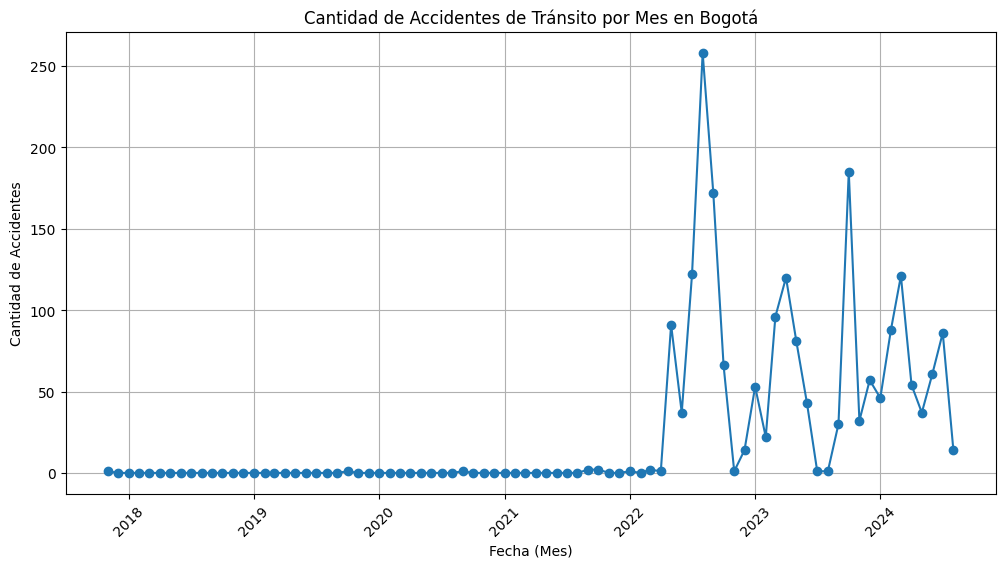

In [27]:
plt.figure(figsize=(12, 6))

# Graficar los accidentes por mes

fecha_oc = np.array(accidentes_por_mes["FECHA_OCURRENCIA_ACC"]  )
accidentes_mes = np.array(accidentes_por_mes["cantidad_accidentes"])

plt.plot(fecha_oc, accidentes_mes, marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

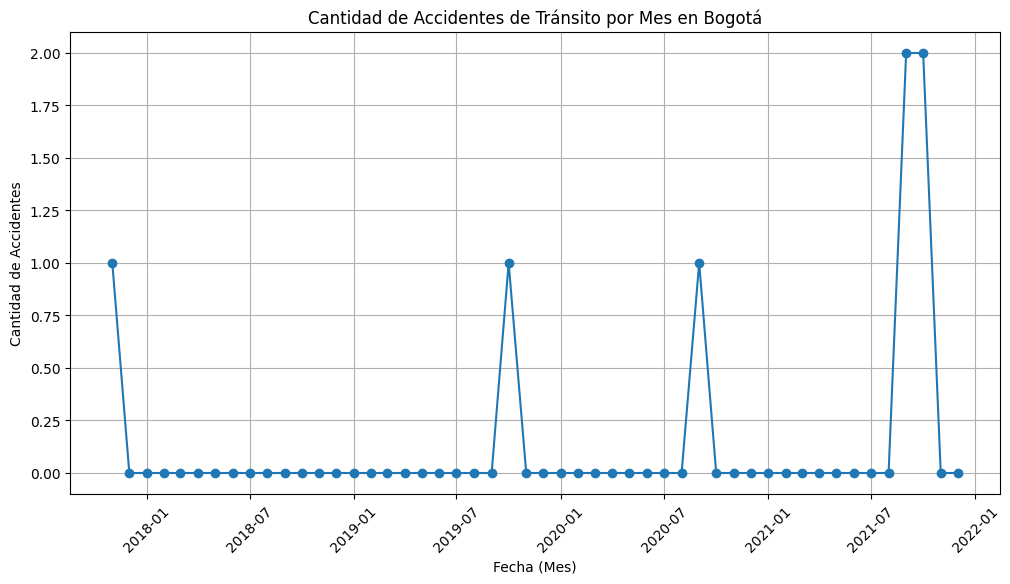

In [28]:
# Filtrar solo los registros hasta el año 2022 (inclusive)
mes_filtrado = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'].dt.year < 2022]

plt.figure(figsize=(12, 6))

fecha_occ_fil = np.array(mes_filtrado['FECHA_OCURRENCIA_ACC'])
mes_filt = np.array(mes_filtrado['cantidad_accidentes'])

# Graficar los accidentes por mes
plt.plot(fecha_occ_fil, mes_filt, marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

Podríamos hallar algún tipo de relación entre los accidentes y la fecha.
En este caso, tomando x = 0, corresponde al 1-11-2017. Los datos se trabajan de forma mensual.

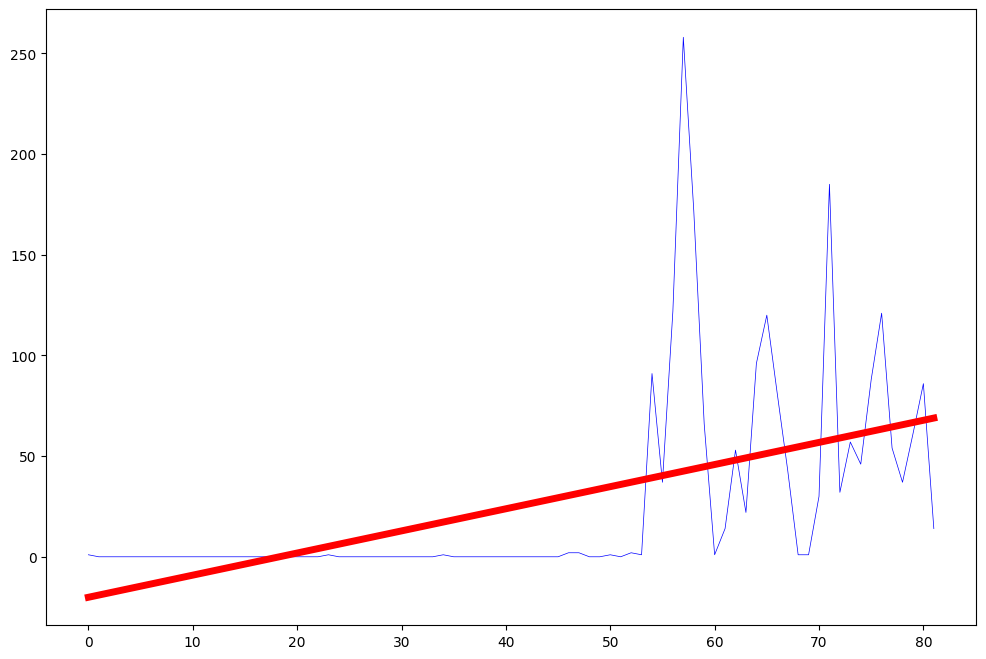

In [29]:
plt.figure( figsize=(12,8) )
X=range(0,82)
Y=accidentes_mes
a = np.inner(X,X)
b = np.sum(X)
c = np.inner(X,Y)
d = np.sum(Y)
N = len(X)
Delta = a*N-b*b
A =(N*c-b*d)/Delta
B =(a*d-b*c)/Delta
Y_pred = A*X+B
plt.plot(X, Y,color='blue', lw = 0.5)
plt.plot(X, Y_pred, color='red', lw = 5)
plt.show()

In [30]:
diff_modelo1 = abs(Y-Y_pred)
diff_modelo1

array([ 21.10990303,  19.01113397,  17.91236491,  16.81359585,
        15.71482679,  14.61605773,  13.51728867,  12.41851961,
        11.31975055,  10.22098149,   9.12221243,   8.02344337,
         6.92467431,   5.82590525,   4.72713619,   3.62836713,
         2.52959807,   1.43082901,   0.33205995,   0.76670911,
         1.86547817,   2.96424723,   4.06301629,   4.16178535,
         6.26055441,   7.35932347,   8.45809253,   9.55686159,
        10.65563065,  11.75439971,  12.85316877,  13.95193783,
        15.05070689,  16.14947595,  16.24824501,  18.34701407,
        19.44578313,  20.54455219,  21.64332125,  22.74209031,
        23.84085937,  24.93962843,  26.03839749,  27.13716655,
        28.23593561,  29.33470467,  28.43347373,  29.53224279,
        32.63101185,  33.72978091,  33.82854997,  35.92731903,
        35.02608809,  37.12485715,  51.77637379,   3.32239527,
        80.57883567, 215.48006661, 128.38129755,  21.28252849,
        44.81624057,  32.91500963,   4.98622131,  27.11

Note que la recta de regresión estará dada por:

$y = 1.0987x - 20.1099 $


¿Y cómo será nuestra gráfica si intentamos hacer regresión por días?

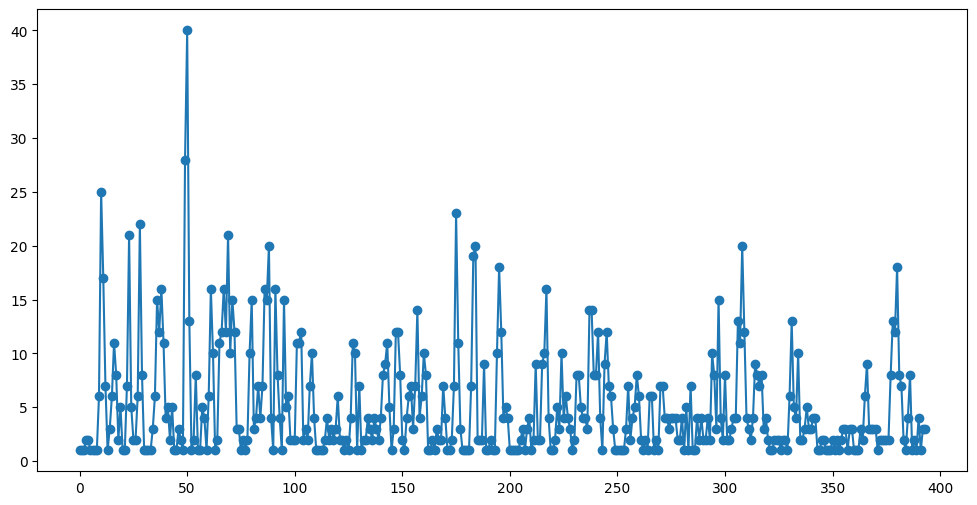

In [31]:
plt.figure(figsize=(12, 6))

# ¿Y por día?
aux_dia = accidentes_data.groupby(accidentes_data['FECHA_OCURRENCIA_ACC'].dt.to_period('D')).size().reset_index(name='cantidad_accidentes')


# Graficar los accidentes por mes

fecha_oc1 = np.array(aux_dia['FECHA_OCURRENCIA_ACC']  )
accidentes_dia = np.array(aux_dia["cantidad_accidentes"])

plt.plot(accidentes_dia, marker='o', linestyle='-')

# Etiquetas y título
#plt.xlabel('Fecha (Mes)')
#plt.ylabel('Cantidad de Accidentes')
#plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
#plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
#plt.grid(True)

# Mostrar la gráfica
plt.show()
#aux_dia

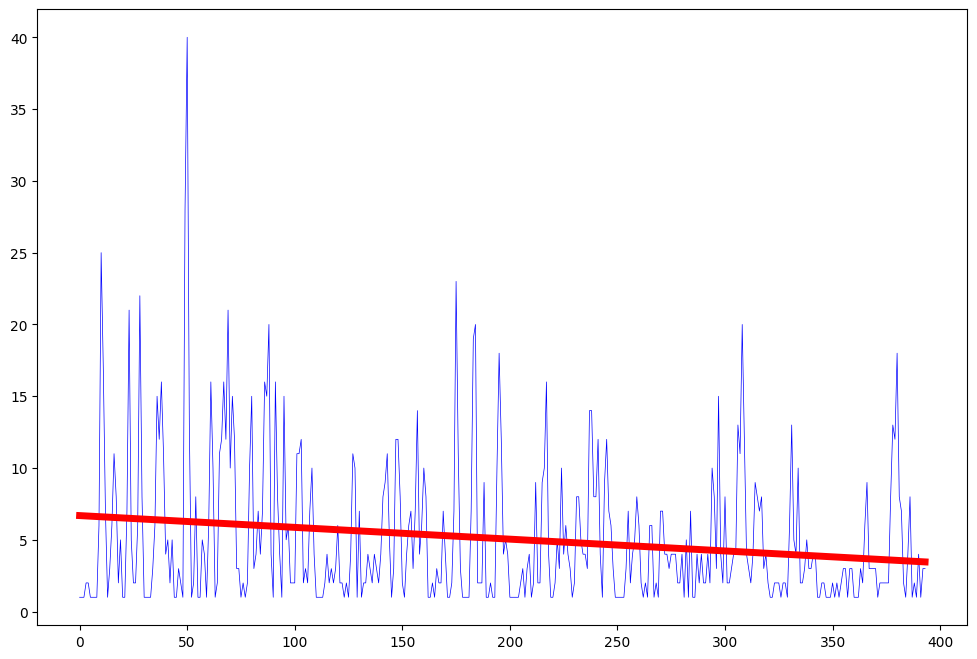

In [32]:
plt.figure( figsize=(12,8) )
X=range(0,394)
Y=accidentes_dia
a = np.inner(X,X)
b = np.sum(X)
c = np.inner(X,Y)
d = np.sum(Y)
N = len(X)
Delta = a*N-b*b
A =(N*c-b*d)/Delta
B =(a*d-b*c)/Delta
Y_pred = A*X+B
plt.plot(X, Y,color='blue', lw = 0.5)
plt.plot(X, Y_pred, color='red', lw = 5)
plt.show()

In [33]:
diff_modelo2 = abs(Y-Y_pred)
diff_modelo2

array([ 5.68923729,  5.68102816,  5.67281902,  4.66460989,  4.65640075,
        5.64819162,  5.63998248,  5.63177334,  5.62356421,  0.61535507,
       18.39285406, 10.4010632 ,  0.40927233,  5.58251853,  3.57430939,
        0.56610026,  4.44210888,  1.45031801,  4.54147285,  1.53326372,
        5.52505458,  5.51684544,  0.49136369, 14.49957283,  1.49221804,
        4.4840089 ,  4.47579977,  0.46759063, 15.54061851,  1.54882764,
        5.44296322,  5.43475409,  5.42654495,  5.41833582,  3.41012668,
        0.40191754,  8.60629159,  5.61450073,  9.62270986,  4.630919  ,
        2.36087187,  1.35266273,  4.34445359,  1.33624446,  5.32803532,
        5.31982619,  3.31161705,  4.30340792,  5.29519878, 21.71301035,
       33.72121949,  6.72942863,  5.26236224,  4.2541531 ,  1.75405603,
        5.23773483,  5.2295257 ,  1.22131656,  2.21310742,  5.20489829,
        0.19668915,  9.81151998,  3.81972912,  5.17206175,  4.16385261,
        4.84435653,  5.85256566,  9.8607748 ,  5.86898393, 14.87

La gráfica ya cambiará un poco, estará dada por:

$y = -0.00821x + 6.689$

Ahora, tenemos dos modelos de regresión: Uno por días y otro por mes. ¿Cuál será más preciso?¿Cuál nos podrá dar mejores resultados?

O más aún, ¿Será mejor realizar otro tipo de interpolación, sea polinomial, exponencial u otro?

Podemos plantear otro modelo, una regresión cuadrática.

0.017342257935863324 -0.3497623810952721


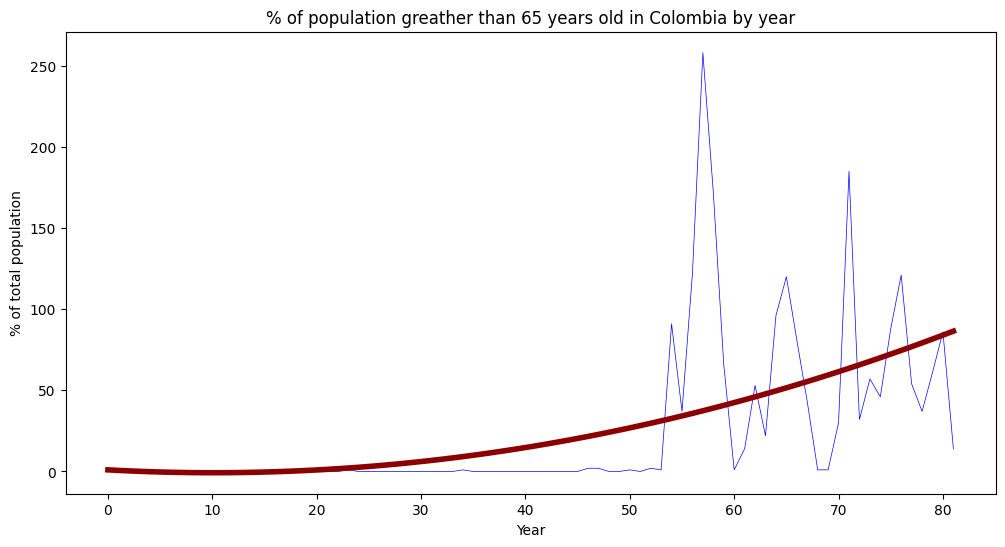

In [34]:
x = np.array(range(0,82))
y = accidentes_mes

X = x.copy() -np.full(len(x),x[0]) ## para evitar overflow es necesario hacer una
                                   ## traslación del eje X.
Y = y.copy()

plt.figure( figsize=(12,6) )
Gamma = Y[0]
YGamma = Y - np.full(len(Y),Gamma)
X2=np.power(X,2)
Y2=np.power(Y,2)
a = np.inner(X2,X2)
b = np.inner(X2,X)
c = np.inner(X2,YGamma)
d = np.inner(X,YGamma)
N = np.sum(X2)
Delta = a*N-b*b
A =(N*c-b*d)/Delta
B =(a*d-b*c)/Delta
YL_pred = A*X**2 + B*X + Gamma
plt.plot(x, y, color='blue', lw = 0.5)
plt.plot(x, YL_pred, color='darkred', lw = 4)
plt.title('% of population greather than 65 years old in Colombia by year')
plt.xlabel('Year')
plt.ylabel('% of total population')

print(A,B)
plt.show()

In [35]:
diff_modelo3 = abs(Y - YL_pred)
diff_modelo3

array([0.00000000e+00, 6.67579877e-01, 3.69844270e-01, 1.06793178e-01,
       1.21573397e-01, 3.15255457e-01, 4.74253001e-01, 5.98566029e-01,
       6.88194541e-01, 7.43138537e-01, 7.63398017e-01, 7.48972982e-01,
       6.99863430e-01, 6.16069363e-01, 4.97590780e-01, 3.44427681e-01,
       1.56580066e-01, 6.59520648e-02, 3.23168712e-01, 6.15069874e-01,
       9.41655552e-01, 1.30292575e+00, 1.69888046e+00, 1.12951968e+00,
       2.59484342e+00, 3.09485168e+00, 3.62954446e+00, 4.19892175e+00,
       4.80298355e+00, 5.44172987e+00, 6.11516071e+00, 6.82327606e+00,
       7.56607593e+00, 8.34356032e+00, 8.15572922e+00, 1.00025826e+01,
       1.08841206e+01, 1.18003430e+01, 1.27512500e+01, 1.37368415e+01,
       1.47571175e+01, 1.58120780e+01, 1.69017230e+01, 1.80260525e+01,
       1.91850666e+01, 2.03787652e+01, 1.96071483e+01, 2.08702159e+01,
       2.41679680e+01, 2.55004046e+01, 2.58675258e+01, 2.82693315e+01,
       2.77058216e+01, 3.01769963e+01, 5.83171444e+01, 2.77660070e+00,
      

En este caso, la ecuación de regresión cuadrática está dada por:

$y = 0.0173x^2 - 0.349x + 1$

Por último plantearemos un modelo de regresión exponencial, que aunque resultará en una curva similar a la cuadratica, puede que resulte con menor error que los anteriores.

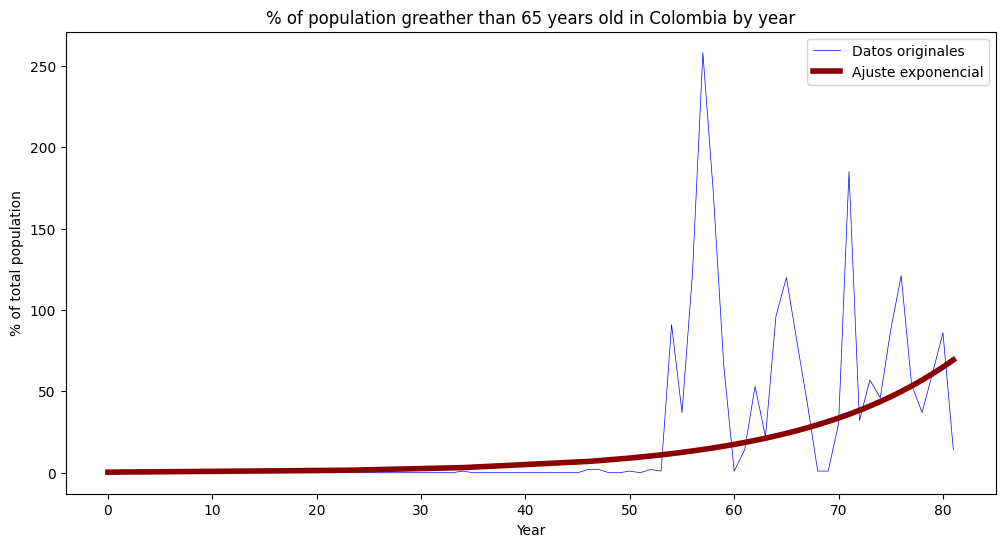

A = 0.33531086451742825, B = 0.06582078330082274


In [38]:
x = np.array(range(0, 82))
y = accidentes_mes

# Evitar overflow trasladando X
X = x.copy() - np.full(len(x), x[0])
Y = y.copy()

# Evitar errores en logaritmo:
# Filtrar valores no positivos
mask = Y > 0  # Solo tomamos valores positivos
X_filtered = X[mask]
Y_filtered = Y[mask]

# Aplicar logaritmo a Y
log_Y = np.log(Y_filtered)

# Cálculo de coeficientes mediante mínimos cuadrados
N = len(X_filtered)
sum_X = np.sum(X_filtered)
sum_log_Y = np.sum(log_Y)
sum_X_log_Y = np.inner(X_filtered, log_Y)
sum_X2 = np.inner(X_filtered, X_filtered)

# Resolver ecuaciones normales para la regresión lineal en log(Y)
B = (N * sum_X_log_Y - sum_X * sum_log_Y) / (N * sum_X2 - sum_X**2)
log_A = (sum_log_Y - B * sum_X) / N
A = np.exp(log_A)  # Volver a escala original

# Generar predicciones usando la función exponencial ajustada
Y_exp_pred = A * np.exp(B * X)

# Graficar resultados
plt.figure(figsize=(12,6))
plt.plot(x, y, color='blue', lw=0.5, label="Datos originales")
plt.plot(X_filtered + x[0], Y_exp_pred[mask], color='darkred', lw=4, label="Ajuste exponencial")
plt.title('% of population greather than 65 years old in Colombia by year')
plt.xlabel('Year')
plt.ylabel('% of total population')
plt.legend()
plt.show()

# Mostrar coeficientes
print(f"A = {A}, B = {B}")


In [39]:
diff_modelo4 = abs(Y - Y_exp_pred)
diff_modelo4

array([6.64689135e-01, 3.58123837e-01, 3.82488896e-01, 4.08511639e-01,
       4.36304847e-01, 4.65988974e-01, 4.97692669e-01, 5.31553334e-01,
       5.67717719e-01, 6.06342559e-01, 6.47595251e-01, 6.91654582e-01,
       7.38711502e-01, 7.88969953e-01, 8.42647753e-01, 8.99977538e-01,
       9.61207771e-01, 1.02660382e+00, 1.09644911e+00, 1.17104634e+00,
       1.25071882e+00, 1.33581184e+00, 1.42669418e+00, 5.23759737e-01,
       1.62742917e+00, 1.73815179e+00, 1.85640745e+00, 1.98270867e+00,
       2.11760283e+00, 2.26167455e+00, 2.41554824e+00, 2.57989076e+00,
       2.75541438e+00, 2.94287980e+00, 2.14309948e+00, 3.35694117e+00,
       3.58533163e+00, 3.82926071e+00, 4.08978557e+00, 4.36803532e+00,
       4.66521587e+00, 4.98261519e+00, 5.32160886e+00, 5.68366606e+00,
       6.07035593e+00, 6.48335436e+00, 4.92445126e+00, 5.39555831e+00,
       7.89871727e+00, 8.43610879e+00, 8.01006190e+00, 9.62306407e+00,
       8.27777203e+00, 9.97702323e+00, 7.92761518e+01, 2.44785164e+01,
      

La ecuación para nuestro modelo de regresión exponencial será:

$Y=0.335\cdot e^{0.065\cdot x}$

Ahora, podemos intentar determinar el error cuadrático de estas aproximaciones, y de esta forma poder determinar qué modelo sería mejor  a priori. Como se tienen más número de datos en el modelo 2 que en los demás, normalizamos.

In [40]:
mean_diff_mod1 = sum(diff_modelo1)/82
mean_diff_mod2 = sum(diff_modelo2)/394
mean_diff_mod3 = sum(diff_modelo3)/82
mean_diff_mod4 = sum(diff_modelo4)/82

In [41]:
print("Error promedio modelo 1: ", mean_diff_mod1)
print("Error promedio modelo 2: ", mean_diff_mod2)
print("Error promedio modelo 3: ", mean_diff_mod3)
print("Error promedio modelo 4: ", mean_diff_mod4)

Error promedio modelo 1:  26.08207487893275
Error promedio modelo 2:  3.70080413467433
Error promedio modelo 3:  21.77047618978108
Error promedio modelo 4:  19.035995482557514


Vemos que el modelo 2, por días, produce menos errores, que los modelos que interpolan en una malla más grande, como por meses.